## Data sets:

In [1]:
#import pandas to work with Dataframes
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from scipy.stats import pearsonr,spearmanr

In [2]:
#set excel data sets for PRAD cells lines to variables
IC50_file = ('Documents\GDSC2_Pancancer_IC_50.xlsx')
Iorio_GV_file = ('Documents\Iorio_GV.csv')

In [3]:
#Read IC50 file to a dataframe. Pandas does not have any issues with this file.
IC50_df = pd.read_excel(IC50_file)

In [4]:
#Read gene variance sheet to a dataframe. Includes extension(not part of data) that Pandas cannot read.
#Additional formatting/size slows pandas down.
GV_df = pd.read_csv(Iorio_GV_file)

## Preprocessing:

In [5]:
#Grouping mutations by cell line and counting genetic variance per cell line. Rename variable 'Gene' to more decriptive 'Genetic variance'
GV_counts_df = GV_df[["COSMIC_ID", "Gene"]].groupby("COSMIC_ID").count()
GV_counts_df = GV_counts_df.rename(columns={'Gene':'Gene_variance'})

In [6]:
#Computing the drug response (average of all Z_scores each drug tested) for each cell line. Named variable 'Z_SCORE' to more accurate 'Drug_response'"
IC50_zscore = IC50_df[["COSMIC_ID", "Z_SCORE"]].groupby("COSMIC_ID").mean()
IC50_zscore = IC50_zscore.rename(columns={'Z_SCORE':'Drug_response'})

In [7]:
#Merging drug response and gentic variance data into a single dataframe.
Pancancer_df = pd.merge(IC50_zscore,GV_counts_df, how='left', on ='COSMIC_ID')
#Eliminating outlier.
Pancancer_df = Pancancer_df.query('12000>Gene_variance')

## Analysis:

In [9]:
#Linear regression statistics for correlation between data.
model = smf.ols(formula='Drug_response~Gene_variance', data=Pancancer_df)
results = model.fit()
summary = results.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:          Drug_response   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.531
Date:                Thu, 18 May 2023   Prob (F-statistic):              0.216
Time:                        20:47:35   Log-Likelihood:                -954.78
No. Observations:                 968   AIC:                             1914.
Df Residuals:                     966   BIC:                             1923.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0095      0.025      0.380

In [10]:
#Spearman corrletion test between drug reponse and gene variance
spearmanr(Pancancer_df['Drug_response'],Pancancer_df['Gene_variance'])

SignificanceResult(statistic=-0.05199758093096666, pvalue=0.1059239356670876)

In [11]:
#Pearson corrletion test between drug reponse and gene variance
pearsonr(Pancancer_df['Drug_response'],Pancancer_df['Gene_variance'])

PearsonRResult(statistic=-0.039776710358354436, pvalue=0.21629093404576324)

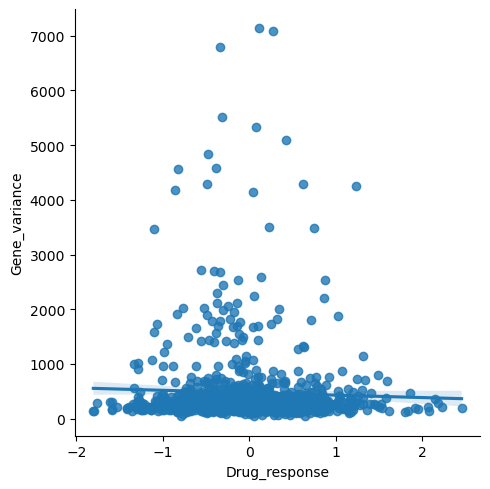

In [12]:
#Linear regression plot depicting linear fit of data
sns.lmplot(data = Pancancer_df, x ='Drug_response',y='Gene_variance')